# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [1]:
!wget 'https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv'
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


--2020-06-04 14:40:02--  https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  59.76K  --.-KB/s    in 0.02s   

2020-06-04 14:40:02 (3.77 MB/s) - ‘titanic.csv.1’ saved [61194/61194]



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

titanic_data = pd.read_csv('titanic.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_data.shape

(891, 12)

In [4]:
print(titanic_data.isna().sum())   #null data print

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


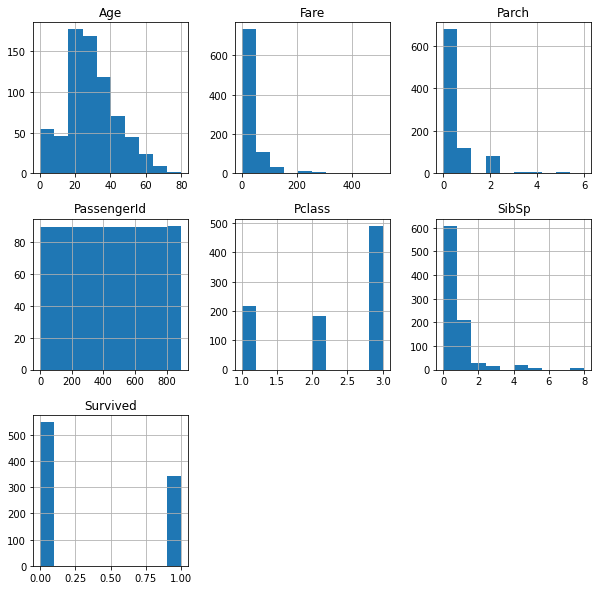

In [5]:
titanic_data.hist(figsize=(10,10))   #plotting histograms of data
unnecessary_col=['PassengerId','Cabin','Name','Ticket']         #redudndant columns

In [6]:
target=titanic_data['Survived']              #output class
features=titanic_data.drop(columns=unnecessary_col)              
features=features.drop(columns=['Survived'])
features['Sex']=features['Sex'].apply(lambda x: 0 if x=="male" else 1)        #object data
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,3,1,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,3,0,35.0,0,0,8.0500,S


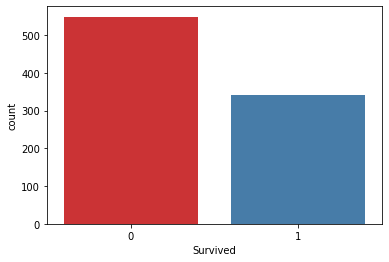

In [7]:
sns.countplot(target, palette='Set1')              #visulize how class data is distributed

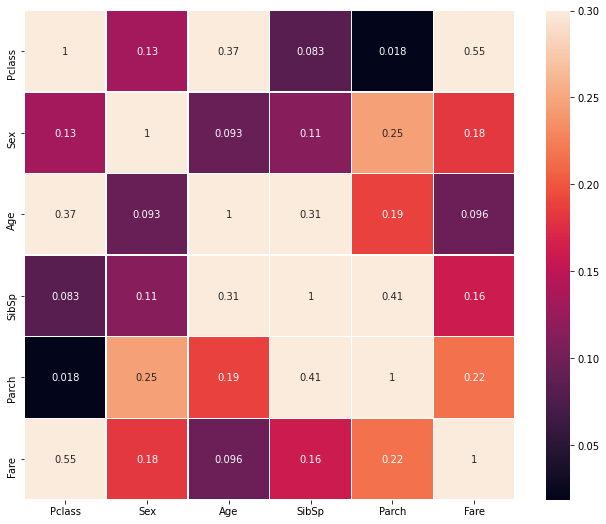

In [8]:
#absolute corelation of features 
f, ax = plt.subplots(figsize=(11, 9))
corr=np.abs(features.corr())              #non negative
sns.heatmap(corr,annot=True, vmax=.3, linewidths=.5)

There are missing values for age feature, there is different ways to fill missing values.One is to fill the mean value but this gives poor result on the data. So KNN is used to fill missing values. known age is used to prepare a model and unknown age is predicted using that model to fill the missing values. 

In [9]:
from sklearn.neighbors import KNeighborsRegressor

fill = KNeighborsRegressor(n_neighbors=7)

features=pd.get_dummies(features)
known_f=features.dropna()  #dropping null rows
print(known_f.shape)                   
Age_f=known_f.Age              #use as target vector
known_f=known_f.drop(columns=['Age'])      #use as features
print(Age_f.shape)
fill.fit(known_f,Age_f)        #model to estimatemissiong values of Age

temp_test = features.loc[features.Age.isnull()]
temp_test=temp_test.drop(columns=['Age'])
temp_test.head() 
predicted_age = fill.predict(temp_test)
    
features.loc[features.Age.isnull(), "Age"] = predicted_age
features.info()

(714, 9)
(714,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=50,max_depth=10, random_state=0)                #random forest model

train_x,test_x,train_y,test_y=train_test_split(features, target, test_size=0.2, random_state=11)
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)
print(confusion_matrix(test_y, pred_y))


[[108  10]
 [ 14  47]]


In [11]:
print(classification_report(test_y, pred_y))         #for survived=1 and not-survided=0

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       118
           1       0.82      0.77      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.87      0.86       179



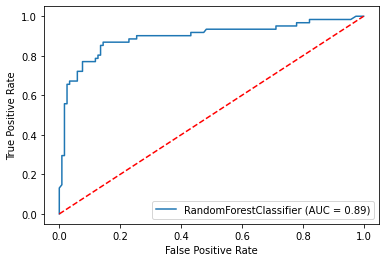

In [12]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf,test_x,test_y)     #roc curve
plt.plot([0,1],[0,1], 'r--')
plt.show()